<a href="https://colab.research.google.com/github/fomen2001/tensor-flow/blob/main/FOMENA_TSATSOP_VALDES_JOEL_CLASS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chargemet et preparation des donnees

In [33]:
from keras.datasets import reuters #bibliotheque pour importer notre dataset
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

num_words = 10000
maxlen = 200
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=num_words)



<ipython-input-34-e16d229df0b8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


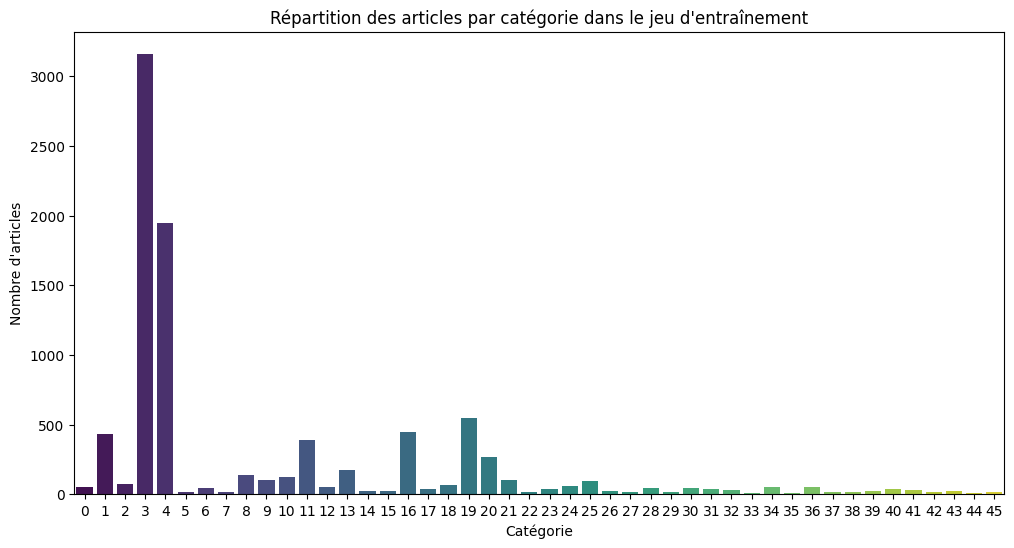

In [34]:
import seaborn as sns
import pandas as pd

# Compter le nombre d'articles par catégorie
class_counts = pd.Series(train_labels).value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Répartition des articles par catégorie dans le jeu d'entraînement")
plt.xlabel("Catégorie")
plt.ylabel("Nombre d'articles")
plt.show()


In [35]:
#affichage rapide des donnees
print(f"Nombre d'articles d'entraînement : {len(train_data)}")
print(f"Nombre d'articles de test : {len(test_data)}")
print(f"Exemple d'article encodé : {train_data[0][:10]}")

Nombre d'articles d'entraînement : 8982
Nombre d'articles de test : 2246
Exemple d'article encodé : [1, 2, 2, 8, 43, 10, 447, 5, 25, 207]


In [36]:
#comprendre les donnees
word_index = reuters.get_word_index()
def decode_article(encoded_article):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_article])

reverse_word_index = {value: key for (key, value) in word_index.items()}
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print("Article decode :")
print(decoded_review)




Article decode :
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [37]:
print(decode_article(train_data[0]))

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [38]:
#pretraitement
x_train = pad_sequences(train_data, maxlen=maxlen)
x_test = pad_sequences(test_data, maxlen=maxlen)
y_train = to_categorical(train_labels, num_classes=46)
y_test = to_categorical(test_labels, num_classes=46)


Construction du modele

In [39]:
from keras import layers, Sequential

model = Sequential()
model.add(layers.Embedding(input_dim=num_words, output_dim=64, input_length=maxlen))
model.add(layers.LSTM(64))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Entrainements et evaluation

In [40]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))



Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 816ms/step - accuracy: 0.2785 - loss: 3.4845 - val_accuracy: 0.3540 - val_loss: 2.4777
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 775ms/step - accuracy: 0.3529 - loss: 2.4457 - val_accuracy: 0.3540 - val_loss: 2.3742
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 777ms/step - accuracy: 0.3715 - loss: 2.3055 - val_accuracy: 0.4600 - val_loss: 2.1337
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 843ms/step - accuracy: 0.4453 - loss: 2.1620 - val_accuracy: 0.4790 - val_loss: 2.0660
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 767ms/step - accuracy: 0.4654 - loss: 2.1041 - val_accuracy: 0.4860 - val_loss: 2.0550
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 769ms/step - accuracy: 0.4642 - loss: 2.1030 - val_accuracy: 0.4770 - val_loss: 2.0285
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 754ms/step - accuracy: 0.4758 - loss: 2.0373 - val_accuracy: 0.4520 - val_loss: 2.0637
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 775ms/step - accuracy: 0.4618 - loss: 2.0792 - val_accu

In [41]:
#visualisation des performances
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

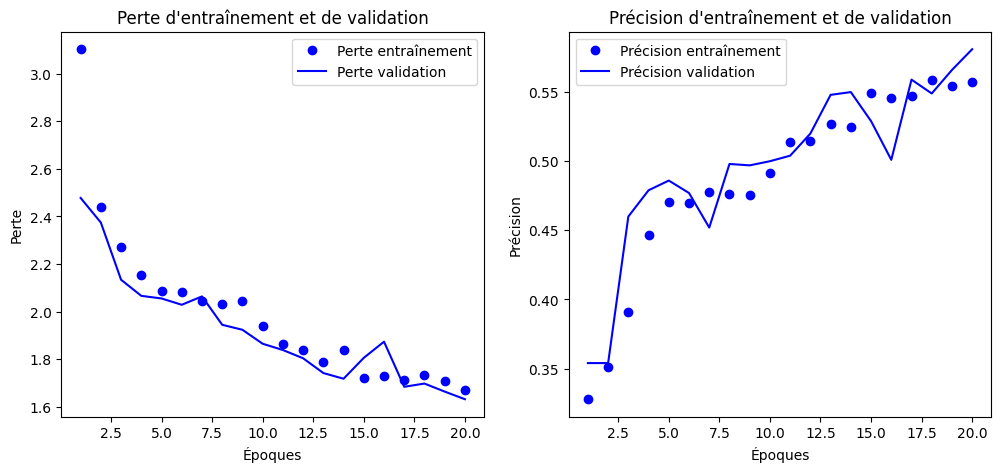

In [42]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'bo', label='Perte entraînement')
plt.plot(epochs, val_loss_values, 'b', label='Perte validation')
plt.title("Perte d'entraînement et de validation")
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Précision entraînement')
plt.plot(epochs, val_acc, 'b', label='Précision validation')
plt.title("Précision d'entraînement et de validation")
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()

In [43]:
plt.show()


In [44]:
#evaluer sur le test
results = model.evaluate(x_test, y_test)
print(f"Test loss : {results[0]}")
print(f"Test accuracy : {results[1]}")


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5846 - loss: 1.6553
Test loss : 1.6742790937423706
Test accuracy : 0.5756900906562805


prediction sur un nouvel article

In [45]:
index = np.random.randint(0, len(x_test))
article = x_test[index].reshape(1, -1)
prediction = model.predict(article)
category_pred = np.argmax(prediction)
category_true = np.argmax(y_test[index])

print(f"Catégorie prédite : {category_pred}")
print(f"Catégorie réelle : {category_true}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
Catégorie prédite : 3
Catégorie réelle : 3
